# Data Visualization

Select a dataset we have used in class (or outside of class).

Generate a plot that you feel visualizes the data is an interesting way. Your plot should have the following elements:

>1) Title
>2) Legend
>3) Axes or other Labels
>4) Color
>5) 1 sentence description of what your plot shows
>6) Brief description of why you chose to make the plot the way you did.

You may use pandas, matplotlib, or seaborn.

Upload a pdf of the plot to Canvas.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
temp= pd.read_csv("../work/Water_Temp.csv")
temp.head()

,Beach Name,January,February,March,April,May,June,July,August,September,October,November,December
0,Crissy Field,53.3,53.1,53.1,52.2,52.3,53.4,55.5,57.3,57.9,56.9,55.4,54.0
1,Newport Beach,58.3,58.4,58.2,58.0,60.9,63.1,63.4,63.8,64.6,64.1,62.0,59.5
2,San Diego Bay,59.1,60.3,62.4,64.1,66.9,69.5,71.7,72.1,71.6,69.3,65.3,60.6
3,La Jolla Cove,58.9,58.9,59.7,60.9,64.1,66.3,67.8,68.3,67.5,65.8,62.9,60.1
4,Laguna Beach,58.4,58.2,58.2,58.1,60.9,63.2,63.4,63.9,64.6,64.1,62.0,59.6


In [4]:
Avg_Results = pd.read_csv("../work/Avg. Results.csv")
Avg_Results.head()

,Beach Name,Avg. Results January,Avg. Results February,Avg. Results March,Avg. Results April,Avg. Results May,Avg. Results June,Avg. Results July,Avg. Results August,Avg. Results September,Avg. Results October,Avg. Results November,Avg. Results December
0,Crissy Field,-,-,-,-,-,-,-,-,-,-,557,783
1,Newport Beach,-,-,-,-,-,-,-,-,-,-,-,100
2,San Diego Bay,-,-,-,-,-,-,-,-,-,41,156,309
3,La Jolla Cove,-,-,-,134,1323,1872,1808,2419,1676,1446,1216,2331
4,Laguna Beach,-,-,-,-,-,-,-,-,-,-,-,26


In [5]:
Avg_Results['Avg. Results December'] = Avg_Results['Avg. Results December'].str.replace('2331','-')
Avg_Results.head()

#Removing a big outlier in the data -- cleaning

,Beach Name,Avg. Results January,Avg. Results February,Avg. Results March,Avg. Results April,Avg. Results May,Avg. Results June,Avg. Results July,Avg. Results August,Avg. Results September,Avg. Results October,Avg. Results November,Avg. Results December
0,Crissy Field,-,-,-,-,-,-,-,-,-,-,557,783
1,Newport Beach,-,-,-,-,-,-,-,-,-,-,-,100
2,San Diego Bay,-,-,-,-,-,-,-,-,-,41,156,309
3,La Jolla Cove,-,-,-,134,1323,1872,1808,2419,1676,1446,1216,-
4,Laguna Beach,-,-,-,-,-,-,-,-,-,-,-,26


In [6]:
def dash_to_zero(s):
    if '-' in s:
        return int(0)
    else:
        return int(s)
    
#cleaning data

In [7]:
X = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#This will be the ticks on the X-axis

In [8]:
LaJC = Avg_Results.loc[Avg_Results["Beach Name"] == "La Jolla Cove" ]
LaJC = LaJC.drop(columns='Beach Name').T.values.flatten().tolist()
Result = [dash_to_zero(s) for s in LaJC]
#converting it into a list from a data frame -- choosing one beach; La Jolla Cove

Temp = temp.loc[temp["Beach Name"] == "La Jolla Cove" ]
Temp= Temp.drop(columns="Beach Name").values.flatten().tolist()
Result

[0, 0, 0, 134, 1323, 1872, 1808, 2419, 1676, 1446, 1216, 0]

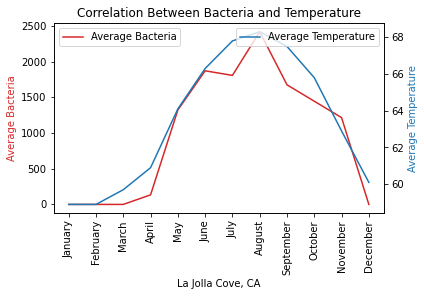

In [12]:
fig, ax1 = plt.subplots()
X_axis = np.arange(1, len(X)+1)

color = 'tab:red' #color 
ax1.set_xlabel('La Jolla Cove, CA') #Label Title of which beach 
ax1.set_ylabel('Average Bacteria', color=color)
ax1.plot(X_axis, Result, color=color)
plt.xticks(X_axis, X, rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue' #color 
ax2.set_ylabel('Average Temperature', color=color)  # we already handled the x-label with ax1
ax2.plot(X_axis, Temp, color=color)

ax1.legend(['Average Bacteria'], loc='upper left')  # Legend for the first plot
ax2.legend(['Average Temperature'], loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Correlation Between Bacteria and Temperature") #Main Title 
plt.savefig('Double_Jolla.pdf')
plt.show()

In [10]:
# sentence description of what your plot shows

# This is a double scale graph with two different y-axis to show the direct correlation between the average results of bacteria and the average result of temperature within each month. 

In [11]:
#Brief description of why you chose to make the plot the way you did.

# I chose this plot, because both y-axis share the same x-axis for the same beach. Visually it allows the viewer to see the correlations together and how they might be a consistent trend. 